# COVID-19 DATA VISUALIZATION

#### In this dataset, I will be doing data visualizations on COVID-19 data. Global confirmed, recovered, and death cases data is visualized.  Data is obtained from CSSEGIS (John Hopkins University).
##### Dataset repository: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [1]:
import pandas as pd # Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Getting the data

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url)
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered = pd.read_csv(url)
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url)
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180174,180259,180347,180419,180520,180584,180615,180615,180688,180741
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276101,276101,276221,276221,276310,276342,276401,276415,276468
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265873,265877,265884,265887,265889,265889,265889,265897,265900,265904
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,43067,43067,43067,43067,43067
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99527,99761,99761,99761,99761,99761,99761,99761,99761,99761


We can see real time daily data is updated along the columns, country/region data are sorted in alphabetical order and there's data on latitude & longitude of each regions.

## Reformatting

As observed above, we can simplify the column names to make it easier to work with.

In [3]:
datasets = [confirmed, recovered, deaths]

for df in datasets:
    df.rename(columns={'Province/State':'state',
                       'Country/Region':'country', 
                       'Lat':'lat', 'Long':'long'}, inplace=True)
deaths.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7701,7701,7705,7707,7708,7708,7708,7708,7709,7709
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


We can change the pivoted (wide) dataframe format and consolidate all data altogether.

In [4]:
names = ['confirmed', 'recovered', 'deaths']
for i, df in enumerate(datasets):
    df = df.melt(id_vars=['country', 'state', 'lat', 'long'], 
                 var_name='date', value_name=names[i])
    df['date'] = pd.to_datetime(df['date'])
    datasets[i] = df
    
confirmed_l, recovered_l, deaths_l = datasets

In [5]:
all_data = confirmed_l.merge(
    recovered_l, on=['country', 'state', 'lat', 'long', 'date'])
all_data = all_data.merge(
    deaths_l, on=['country', 'state', 'lat', 'long', 'date'])
all_data

,country,state,lat,long,date,confirmed,recovered,deaths
0,Afghanistan,NaN,33.939110,67.709953,2020-01-22,0,0,0
1,Albania,NaN,41.153300,20.168300,2020-01-22,0,0,0
2,Algeria,NaN,28.033900,1.659600,2020-01-22,0,0,0
3,Andorra,NaN,42.506300,1.521800,2020-01-22,0,0,0
4,Angola,NaN,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
229147,West Bank and Gaza,NaN,31.952200,35.233200,2022-06-07,657879,0,5660
229148,Winter Olympics 2022,NaN,39.904200,116.407400,2022-06-07,535,0,0
229149,Yemen,NaN,15.552727,48.516388,2022-06-07,11822,0,2149
229150,Zambia,NaN,-13.133897,27.849332,2022-06-07,322562,0,3988


In [6]:
country = all_data.groupby(['country', 'date']).sum().reset_index()
country = country.drop(['lat', 'long'], axis=1)

country_total = country.groupby('country').agg(
    {'confirmed':'sum', 'recovered':'sum', 'deaths':'sum'}).reset_index()
country_total

,country,confirmed,recovered,deaths
0,Afghanistan,75359610,18289880,3274026
1,Albania,96711349,22652652,1502481
2,Algeria,108517652,25670233,3009489
3,Andorra,11782868,3085649,83845
4,Angola,31593946,5895800,704094
...,...,...,...,...
190,West Bank and Gaza,221517536,57608773,2188023
191,Winter Olympics 2022,67337,0,0
192,Yemen,4602337,772497,922585
193,Zambia,104208951,21852796,1525792


We can count total of all 3 values from start of data entry until today.

In [7]:
totals = country_total[['confirmed', 'recovered', 'deaths']].sum(axis=0)
print(totals)

confirmed    144807049634
recovered     23208807971
deaths         2569063047
dtype: int64


## Visualization
We can visualize totals and severity of COVID-19 per country from above dataframes.

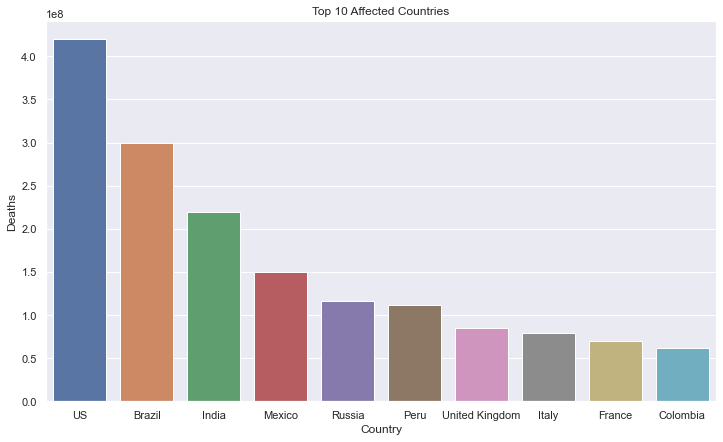

In [13]:
top_deaths = country_total.sort_values('deaths', ascending=False).head(10)

plt.figure(figsize=(12,7))
sns.set_theme()
sns.barplot(x=top_deaths['country'], y=top_deaths['deaths'])
plt.title('Top 10 Affected Countries')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.show()

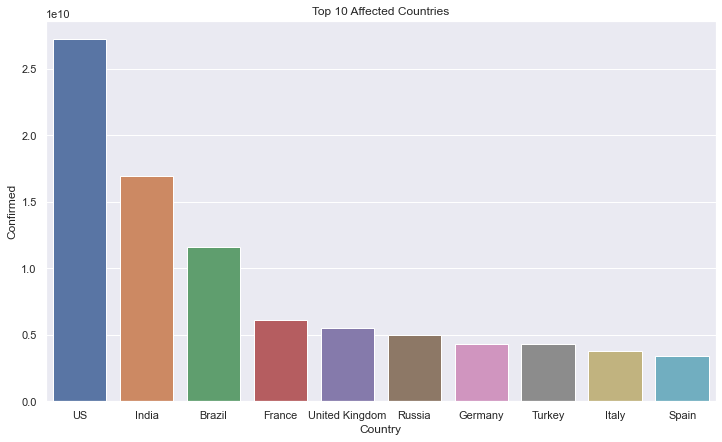

In [9]:
top_confirmed = country_total.sort_values('confirmed', ascending=False).head(10)

plt.figure(figsize=(12,7))
sns.set_theme()
sns.barplot(x=top_confirmed['country'], y=top_confirmed['confirmed'])
plt.title('Top 10 Affected Countries')
plt.xlabel('Country')
plt.ylabel('Confirmed')
plt.show()

Then, we can view the confirmed, recovered, and death numbers from beginning to latest data entry.

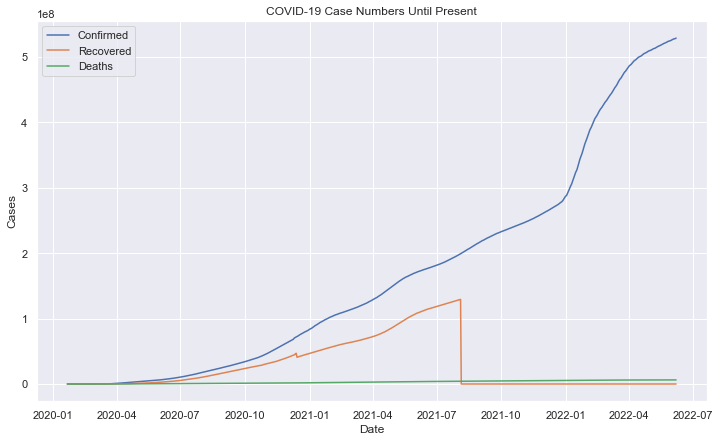

In [17]:
total_by_date = country.groupby('date').sum()

sns.set_theme()
plt.figure(figsize=(12,7))
plt.plot(total_by_date['confirmed'], label='Confirmed')
plt.plot(total_by_date['recovered'], label='Recovered')
plt.plot(total_by_date['deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Case Numbers Until Present')
plt.legend()
plt.show()

Finally, we are able to graphically visualize severity per country in terms of confirmed cases using a map.

In [41]:
m = folium.Map(location=(2,0), tiles='cartodbpositron', zoom_start=2, max_zoom=6, min_zoom=2)
confirmed.dropna(subset=['lat','long'], inplace=True)

for i in range(len(confirmed)):
    folium.Circle(
        location=[confirmed.lat.iloc[i], confirmed.long.iloc[i]],
        fill=True,
        fill_color='red',
        color='red',
        radius=int(np.log(confirmed.iloc[i,-1]+1.00001))*10000,
        popup=('{} ({})'.format(
            confirmed.country.iloc[i],
            confirmed.iloc[i,-1]))).add_to(m)

m